*Analísis exploratorio de datos*

In [2]:
#importacion de datos
import pandas as pd
dataset = pd.read_excel("data/BASE DE DATOS PCC.xlsx")
dataset.head(10)

,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,12000,2024-01-28 12:07:29,2024-01-28 12:35:45,00:28:16,28.27,No,NaN
1,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-28 11:49:01,2024-01-28 12:07:29,00:18:28,18.47,No,NaN
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,28000,2024-01-29 07:29:18,2024-01-29 08:18:30,00:49:12,49.20,No,NaN
3,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0,2024-01-29 06:53:59,2024-01-29 07:29:18,00:35:19,35.32,No,NaN
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,PLAY,24660,2023-08-24 00:15:33,2023-08-24 00:49:30,00:33:57,33.95,No,6.0
5,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,jhenao,STOP,0,2023-08-24 00:11:56,2023-08-24 00:15:33,00:03:37,3.62,No,6.0
6,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,4200,2023-08-28 00:31:58,2023-08-28 01:01:06,00:29:08,29.13,No,2.0
7,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,3320,2023-08-28 01:56:18,2023-08-28 02:28:50,00:32:32,32.53,No,2.0
8,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-27 22:41:15,2023-08-27 23:59:59,01:18:44,78.73,No,2.0
9,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0,2023-08-28 00:00:00,2023-08-28 00:18:40,00:18:40,18.67,No,2.0


In [3]:
#Descripcion de datos
dataset.describe().style.background_gradient(cmap = "plasma")

,Pedido,OP,Duración [min],Info. Extra 1
count,23651.000000,23651.000000,23649.000000,23590.000000
mean,29108.328189,10384.506025,63.043219,11.435566
std,852.693763,867.892852,57.925490,13.725752
min,25301.000000,6362.000000,0.070000,1.000000
25%,28492.000000,9772.000000,21.950000,4.000000
50%,29158.000000,10445.000000,45.280000,6.000000
75%,29791.500000,11081.000000,85.630000,16.000000
max,30623.000000,11899.000000,499.480000,160.000000


*Algunos datos de duración están vacíos*

In [4]:
#Descripcion de las variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23651 entries, 0 to 23650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pedido          23651 non-null  int64  
 1   OP              23651 non-null  int64  
 2   Referencia      23651 non-null  object 
 3   Maquina         23651 non-null  object 
 4   Sección         23651 non-null  object 
 5   Proceso         23651 non-null  object 
 6   Usuario         23651 non-null  object 
 7   Estado          23651 non-null  object 
 8   Fabricadas      23651 non-null  object 
 9   Fecha inicio    23651 non-null  object 
 10  Fecha fin       23651 non-null  object 
 11  Duración        23651 non-null  object 
 12  Duración [min]  23649 non-null  float64
 13  Ayudante        23651 non-null  object 
 14  Info. Extra 1   23590 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 2.7+ MB


*Los datos como las fechas inicio y fin deben ser transformadas en timestamps para poder ser procesadas correctamente en caso de querer hacer operaciones con ellas (en este momento son objetos para el dataset, posiblemente reconocidas como texto)*
*Otras variables pueden ser analizadas para ser transformadas en dummies, como usuario o estado.* **No se tienen valores nulos en las variables**

In [5]:
#Buscar por valores duplicados
dataset.duplicated().sum()

0

**No se tienen valores duplicados en la base de datos**

In [6]:
#Verificar por posibles variantes sin variacion
single_unique = dataset.nunique()
single_unique

Pedido             3092
OP                 3128
Referencia          842
Maquina              13
Sección               3
Proceso              17
Usuario              34
Estado                2
Fabricadas         3820
Fecha inicio      23131
Fecha fin         23125
Duración           9062
Duración [min]     9117
Ayudante              1
Info. Extra 1        42
dtype: int64

**Análisis preliminar de los datos**

*La variable **Ayudante** no tiene variabilidad*

*La variable **Estado** es binaria**

*La base de datos solo muestra información sobre 3 secciones distintas de la empresa*

*La empresa posee 13 máquinas distintas*

*Produjo 842 referencias distintas de productos en la ventana de tiempo en la que se registraron los datos*

*La empresa realiza 17 procesos distintos en la producción*

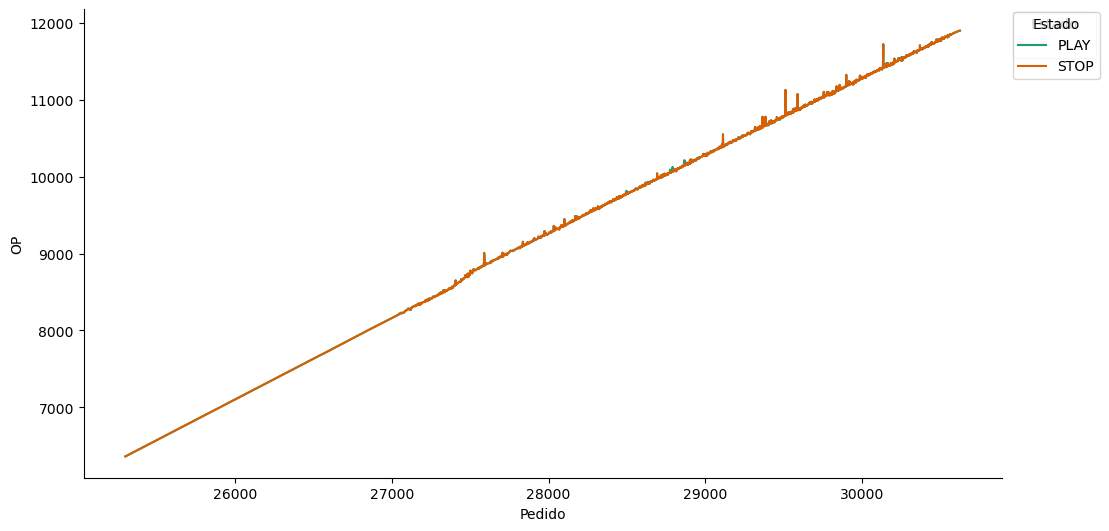

In [7]:
# @title Pedido vs OP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Pedido']
  ys = series['OP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('Pedido', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Estado')):
  _plot_series(series, series_name, i)
  fig.legend(title='Estado', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Pedido')
_ = plt.ylabel('OP')

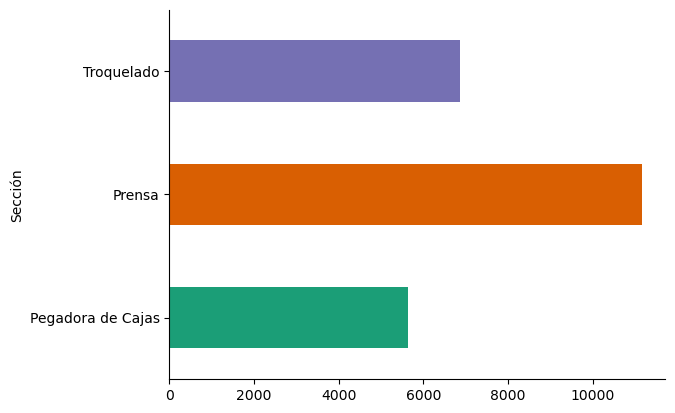

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Sección').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:

#Transformar fabricadas a numerico
dataset['Fabricadas'] = pd.to_numeric(dataset['Fabricadas'], errors='coerce')
# Transformar la columna de fecha a datetime
dataset['Fecha inicio'] = pd.to_datetime(dataset['Fecha inicio'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dataset['Fecha fin'] = pd.to_datetime(dataset['Fecha fin'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dataset['Duración'] = pd.to_timedelta(dataset['Duración'])
dataset['Duración'] = dataset['Duración'].dt.total_seconds()  # Convertir a horas
# Verificar el tipo de datos de las columnas

# Verificar si hay valores nulos en la columna de fecha
print(dataset['Fecha inicio'].isnull().sum())
print(dataset['Fecha fin'].isnull().sum())
# Mostrar las primeras 10 filas
dataset.head(10)




0
0


,Pedido,OP,Referencia,Maquina,Sección,Proceso,Usuario,Estado,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Ayudante,Info. Extra 1
0,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,12000.0,2024-01-28 12:07:29,2024-01-28 12:35:45,1696.0,28.27,No,NaN
1,25301,6362,PT-0000001709,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0.0,2024-01-28 11:49:01,2024-01-28 12:07:29,1108.0,18.47,No,NaN
2,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,Pegar,dcardona,PLAY,28000.0,2024-01-29 07:29:18,2024-01-29 08:18:30,2952.0,49.20,No,NaN
3,26146,7258,PT-0000000197,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,cambiorefe,dcardona,STOP,0.0,2024-01-29 06:53:59,2024-01-29 07:29:18,2119.0,35.32,No,NaN
4,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,jhenao,PLAY,24660.0,2023-08-24 00:15:33,2023-08-24 00:49:30,2037.0,33.95,No,6.0
5,26550,7685,PT-0000001846,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,jhenao,STOP,0.0,2023-08-24 00:11:56,2023-08-24 00:15:33,217.0,3.62,No,6.0
6,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,4200.0,2023-08-28 00:31:58,2023-08-28 01:01:06,1748.0,29.13,No,2.0
7,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,Imprimir,cpiedrahit,PLAY,3320.0,2023-08-28 01:56:18,2023-08-28 02:28:50,1952.0,32.53,No,2.0
8,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0.0,2023-08-27 22:41:15,2023-08-27 23:59:59,4724.0,78.73,No,2.0
9,26589,7725,PT-0000000616,MAQSPEED - Maquina Speed master pliego 6,Prensa,cambiorefe,cpiedrahit,STOP,0.0,2023-08-28 00:00:00,2023-08-28 00:18:40,1120.0,18.67,No,2.0


In [10]:
new_dataset = dataset.copy()

new_dataset['Usuario_encoded'] = pd.factorize(dataset['Usuario'])[0]
new_dataset['Sección_encoded'] = pd.factorize(dataset['Sección'])[0]
new_dataset['Estado_encoded'] = pd.factorize(dataset['Estado'])[0]

new_dataset['Pedido_encoded'] = pd.factorize(dataset['Pedido'])[0]
new_dataset['Referencia_encoded'] = pd.factorize(dataset['Referencia'])[0]
new_dataset['Maquina_encoded'] = pd.factorize(dataset['Maquina'])[0]
new_dataset['Proceso_encoded'] = pd.factorize(dataset['Proceso'])[0]
new_dataset['Ayudante_encoded'] = pd.factorize(dataset['Ayudante'])[0]

new_dataset.drop(columns=['Usuario', 'Sección', 'Estado', 'Pedido', 'Referencia', 'Maquina', 'Proceso', 'Ayudante'], inplace=True)
# Mostrar las primeras 10 filas del nuevo dataset
new_dataset.head(10)

,OP,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Info. Extra 1,Usuario_encoded,Sección_encoded,Estado_encoded,Pedido_encoded,Referencia_encoded,Maquina_encoded,Proceso_encoded,Ayudante_encoded
0,6362,12000.0,2024-01-28 12:07:29,2024-01-28 12:35:45,1696.0,28.27,NaN,0,0,0,0,0,0,0,0
1,6362,0.0,2024-01-28 11:49:01,2024-01-28 12:07:29,1108.0,18.47,NaN,0,0,1,0,0,0,1,0
2,7258,28000.0,2024-01-29 07:29:18,2024-01-29 08:18:30,2952.0,49.20,NaN,0,0,0,1,1,0,0,0
3,7258,0.0,2024-01-29 06:53:59,2024-01-29 07:29:18,2119.0,35.32,NaN,0,0,1,1,1,0,1,0
4,7685,24660.0,2023-08-24 00:15:33,2023-08-24 00:49:30,2037.0,33.95,6.0,1,1,0,2,2,1,2,0
5,7685,0.0,2023-08-24 00:11:56,2023-08-24 00:15:33,217.0,3.62,6.0,1,1,1,2,2,1,1,0
6,7725,4200.0,2023-08-28 00:31:58,2023-08-28 01:01:06,1748.0,29.13,2.0,2,1,0,3,3,1,2,0
7,7725,3320.0,2023-08-28 01:56:18,2023-08-28 02:28:50,1952.0,32.53,2.0,2,1,0,3,3,1,2,0
8,7725,0.0,2023-08-27 22:41:15,2023-08-27 23:59:59,4724.0,78.73,2.0,2,1,1,3,3,1,1,0
9,7725,0.0,2023-08-28 00:00:00,2023-08-28 00:18:40,1120.0,18.67,2.0,2,1,1,3,3,1,1,0


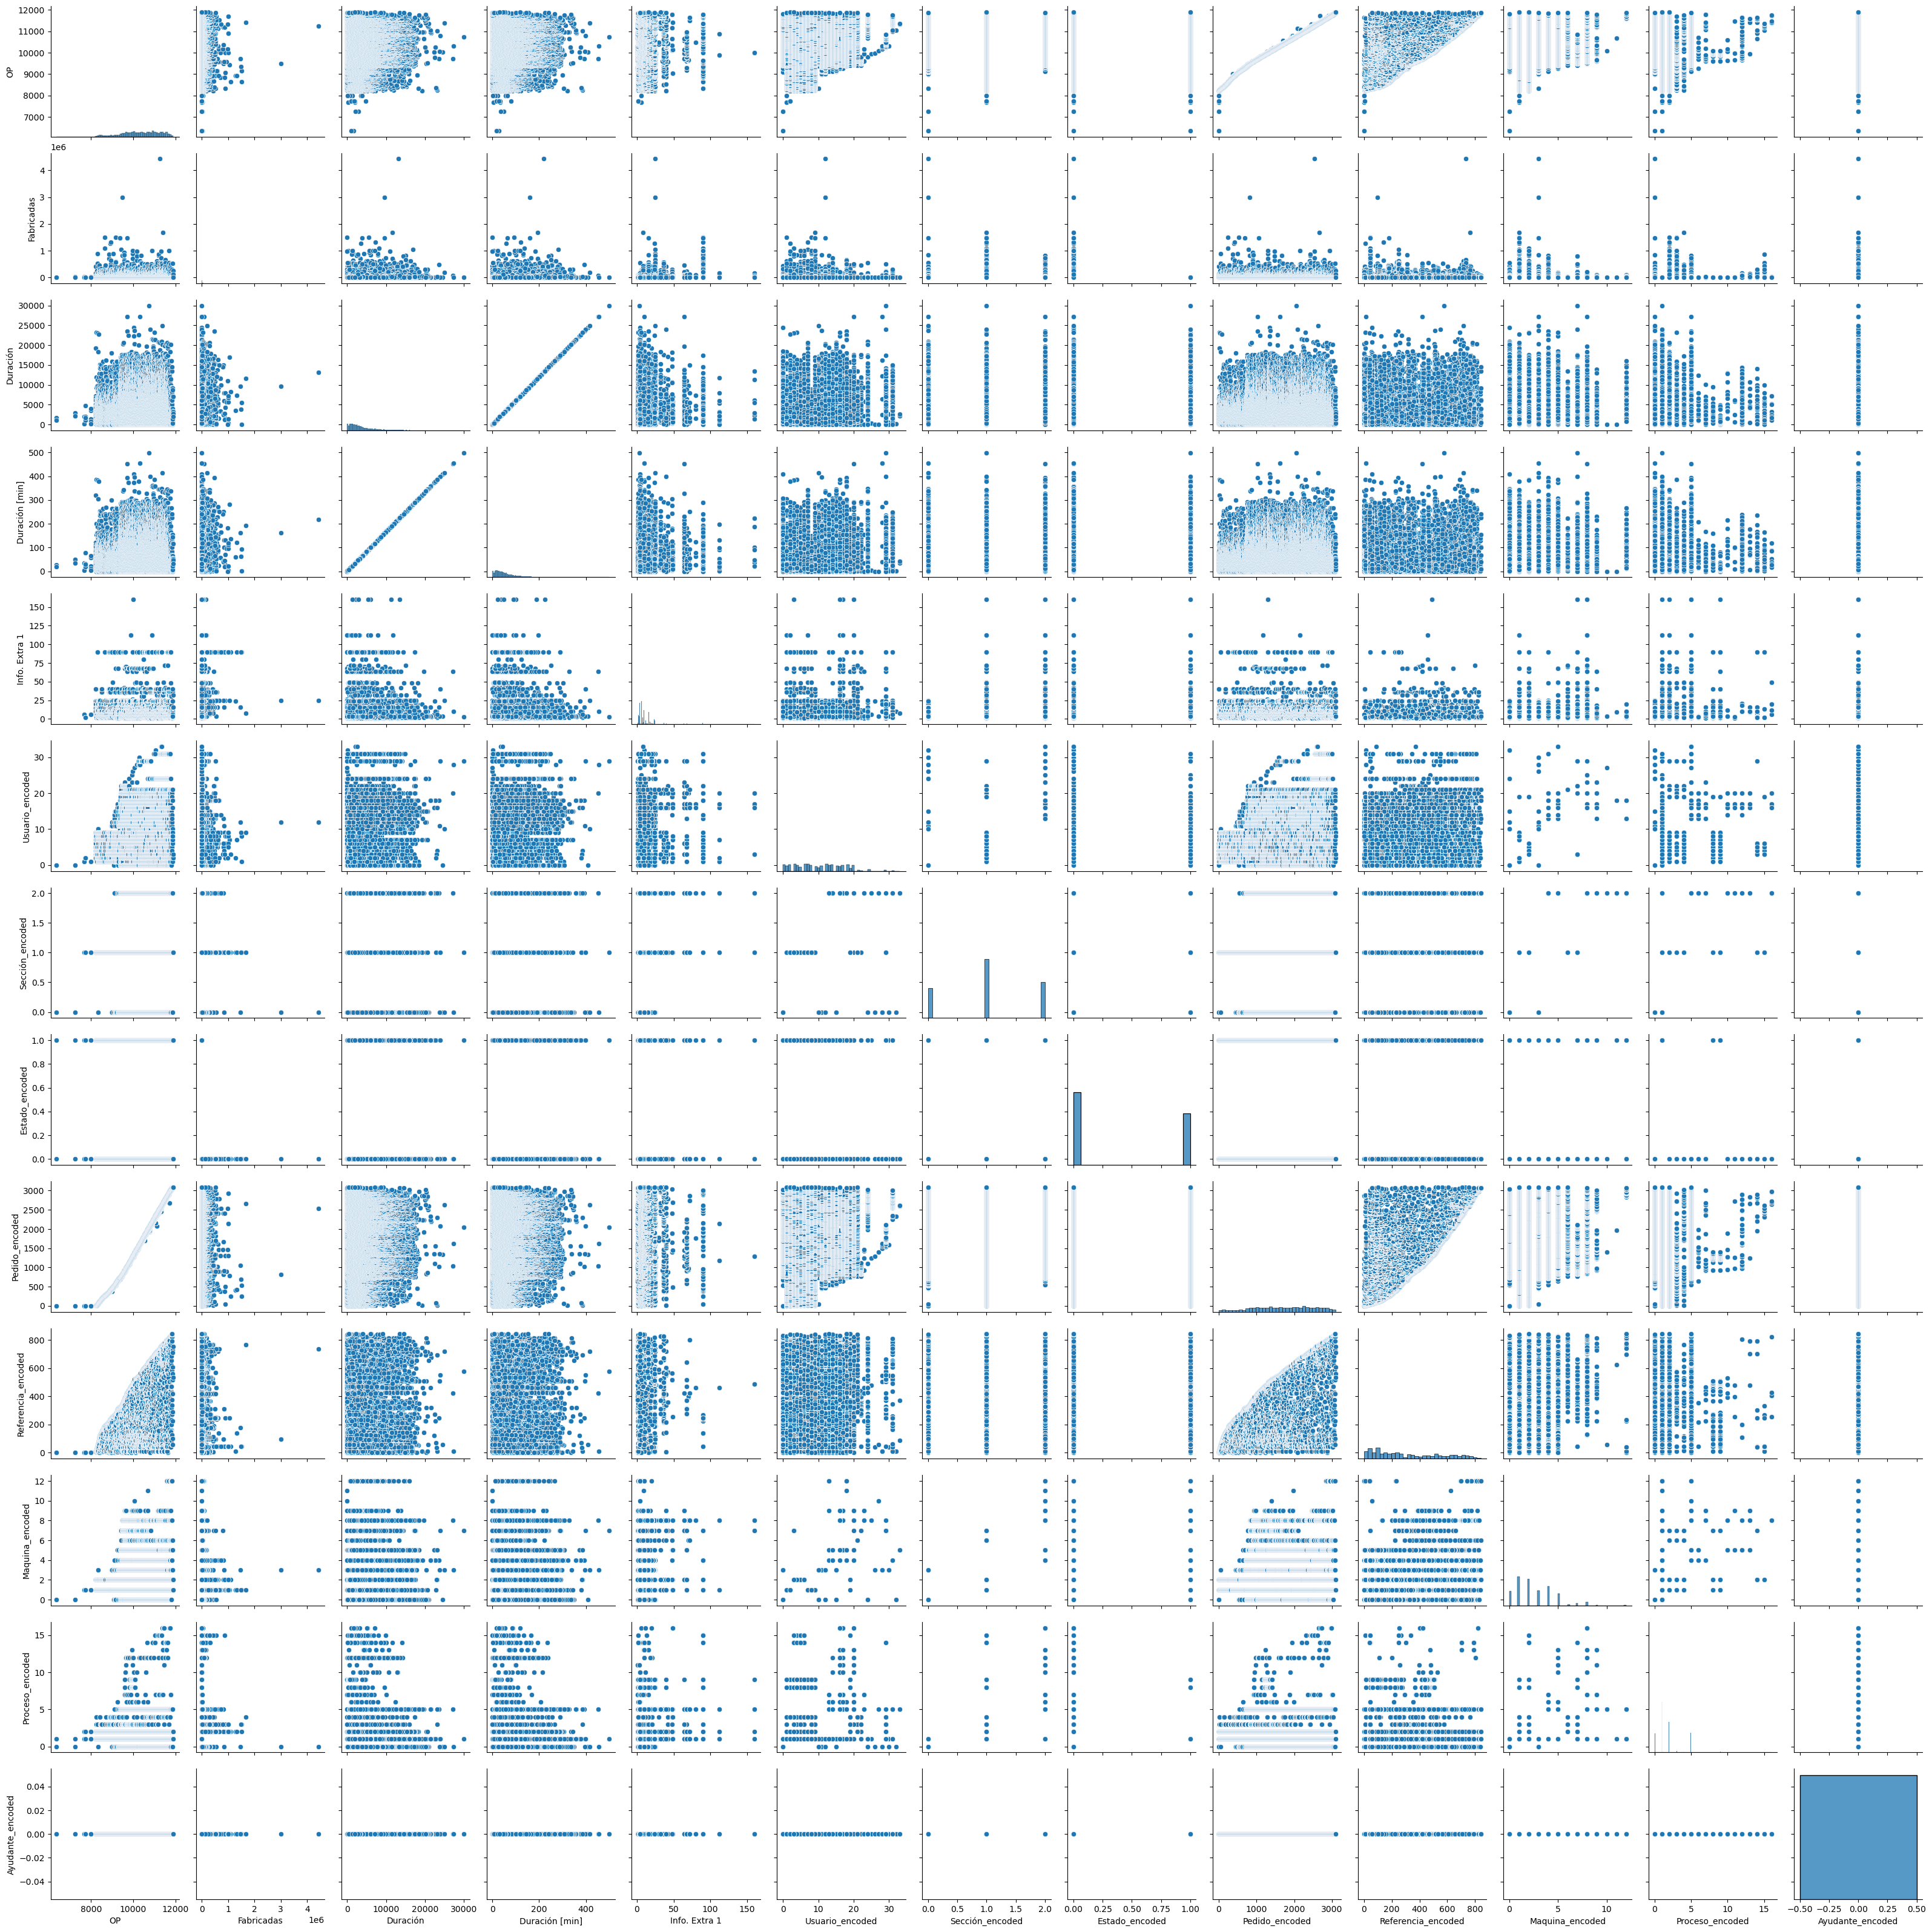

In [11]:
sns.pairplot(new_dataset)
plt.show()
print("")

In [12]:
#TODO: Hacer un análisis de outliers

In [13]:
covar_matrix = new_dataset.drop(columns=['Fecha inicio','Fecha fin']).cov()
covar_matrix.style.background_gradient(cmap='plasma')

#TODO:Ajustar el codigo para analizar las variables con mayor variacion

,OP,Fabricadas,Duración,Duración [min],Info. Extra 1,Usuario_encoded,Sección_encoded,Estado_encoded,Pedido_encoded,Referencia_encoded,Maquina_encoded,Proceso_encoded,Ayudante_encoded
OP,753238.002786,-438013.911354,125217.409174,2087.115381,-374.371367,1366.589936,28.187018,-11.857127,683726.098298,105825.355657,214.475612,95.795533,0.000000
Fabricadas,-438013.911354,5503992663.150707,63839038.824963,1063951.853677,268882.348769,-15888.868997,-179.989856,-9604.704182,-383556.174195,-296274.162439,-4038.282360,14420.858802,0.000000
Duración,125217.409174,63839038.824963,12079511.789423,201321.900907,-1516.812555,3848.769881,-16.245758,-393.873227,107544.140953,22220.501661,555.663438,390.538026,0.000000
Duración [min],2087.115381,1063951.853677,201321.900907,3355.362421,-25.209703,64.171763,-0.271037,-6.567339,1792.417348,371.302221,9.277248,6.512565,0.000000
Info. Extra 1,-374.371367,268882.348769,-1516.812555,-25.209703,188.396268,2.297986,0.345760,-0.004466,-402.861245,14.569187,2.720633,1.113966,0.000000
Usuario_encoded,1366.589936,-15888.868997,3848.769881,64.171763,2.297986,44.600124,1.911160,-0.044485,1184.920121,212.597483,8.319487,3.119858,0.000000
Sección_encoded,28.187018,-179.989856,-16.245758,-0.271037,0.345760,1.911160,0.525634,0.016080,24.981672,3.723807,0.920615,0.813391,0.000000
Estado_encoded,-11.857127,-9604.704182,-393.873227,-6.567339,-0.004466,-0.044485,0.016080,0.242676,-10.809667,0.419940,0.000193,-0.332985,0.000000
Pedido_encoded,683726.098298,-383556.174195,107544.140953,1792.417348,-402.861245,1184.920121,24.981672,-10.809667,624714.474476,96639.508817,177.545519,82.572100,0.000000
Referencia_encoded,105825.355657,-296274.162439,22220.501661,371.302221,14.569187,212.597483,3.723807,0.419940,96639.508817,57873.482787,49.633777,-2.469620,0.000000


In [14]:
corr_matrix = new_dataset.drop(columns=['Fecha inicio','Fecha fin']).corr()
corr_matrix.style.background_gradient(cmap = "plasma")

c:\Users\karen\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\karen\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,OP,Fabricadas,Duración,Duración [min],Info. Extra 1,Usuario_encoded,Sección_encoded,Estado_encoded,Pedido_encoded,Referencia_encoded,Maquina_encoded,Proceso_encoded,Ayudante_encoded
OP,1.000000,-0.006803,0.041512,0.041514,-0.031486,0.235778,0.044796,-0.027733,0.996725,0.506855,0.123077,0.055890,nan
Fabricadas,-0.006803,1.000000,0.247580,0.247566,0.263729,-0.032068,-0.003346,-0.262802,-0.006541,-0.016600,-0.027110,0.098426,nan
Duración,0.041512,0.247580,1.000000,1.000000,-0.031772,0.165817,-0.006447,-0.230048,0.039149,0.026576,0.079626,0.056898,nan
Duración [min],0.041514,0.247566,1.000000,1.000000,-0.031684,0.165881,-0.006454,-0.230145,0.039148,0.026645,0.079774,0.056932,nan
Info. Extra 1,-0.031486,0.263729,-0.031772,-0.031684,1.000000,0.025073,0.034741,-0.000661,-0.037165,0.004410,0.098964,0.041084,nan
Usuario_encoded,0.235778,-0.032068,0.165817,0.165881,0.025073,1.000000,0.394718,-0.013522,0.224481,0.132328,0.620431,0.236551,nan
Sección_encoded,0.044796,-0.003346,-0.006447,-0.006454,0.034741,0.394718,1.000000,0.045023,0.043595,0.021350,0.632414,0.568088,nan
Estado_encoded,-0.027733,-0.262802,-0.230048,-0.230145,-0.000661,-0.013522,0.045023,1.000000,-0.027762,0.003544,0.000196,-0.342270,nan
Pedido_encoded,0.996725,-0.006541,0.039149,0.039148,-0.037165,0.224481,0.043595,-0.027762,1.000000,0.508246,0.111875,0.052899,nan
Referencia_encoded,0.506855,-0.016600,0.026576,0.026645,0.004410,0.132328,0.021350,0.003544,0.508246,1.000000,0.102755,-0.005198,nan


In [15]:
threshold = 0.5
corr_matrix[corr_matrix>threshold].style.background_gradient(cmap = "plasma")


c:\Users\karen\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\karen\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,OP,Fabricadas,Duración,Duración [min],Info. Extra 1,Usuario_encoded,Sección_encoded,Estado_encoded,Pedido_encoded,Referencia_encoded,Maquina_encoded,Proceso_encoded,Ayudante_encoded
OP,1.000000,nan,nan,nan,nan,nan,nan,nan,0.996725,0.506855,nan,nan,nan
Fabricadas,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Duración,nan,nan,1.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
Duración [min],nan,nan,1.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
Info. Extra 1,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan
Usuario_encoded,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,0.620431,nan,nan
Sección_encoded,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,0.632414,0.568088,nan
Estado_encoded,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan
Pedido_encoded,0.996725,nan,nan,nan,nan,nan,nan,nan,1.000000,0.508246,nan,nan,nan
Referencia_encoded,0.506855,nan,nan,nan,nan,nan,nan,nan,0.508246,1.000000,nan,nan,nan


In [16]:
#TODO: Seleccionar las variables con menor correlacion manteniendo aquellas con mayor varianza - Rango intercuartil

Mantener: 

Nota para el trabajo: describir la distribución de las maquinas (# de pegadoras, # ) y los procesos por sección 

In [17]:
new_dataset.dropna(inplace=True,how='any')
print(f"Total de datos después de eliminar nulos: {len(new_dataset)}")
new_dataset.head(10)

Total de datos después de eliminar nulos: 23587


,OP,Fabricadas,Fecha inicio,Fecha fin,Duración,Duración [min],Info. Extra 1,Usuario_encoded,Sección_encoded,Estado_encoded,Pedido_encoded,Referencia_encoded,Maquina_encoded,Proceso_encoded,Ayudante_encoded
4,7685,24660.0,2023-08-24 00:15:33,2023-08-24 00:49:30,2037.0,33.95,6.0,1,1,0,2,2,1,2,0
5,7685,0.0,2023-08-24 00:11:56,2023-08-24 00:15:33,217.0,3.62,6.0,1,1,1,2,2,1,1,0
6,7725,4200.0,2023-08-28 00:31:58,2023-08-28 01:01:06,1748.0,29.13,2.0,2,1,0,3,3,1,2,0
7,7725,3320.0,2023-08-28 01:56:18,2023-08-28 02:28:50,1952.0,32.53,2.0,2,1,0,3,3,1,2,0
8,7725,0.0,2023-08-27 22:41:15,2023-08-27 23:59:59,4724.0,78.73,2.0,2,1,1,3,3,1,1,0
9,7725,0.0,2023-08-28 00:00:00,2023-08-28 00:18:40,1120.0,18.67,2.0,2,1,1,3,3,1,1,0
10,7725,0.0,2023-08-28 01:27:02,2023-08-28 01:56:18,1756.0,29.27,2.0,2,1,1,3,3,1,1,0
11,7999,0.0,2023-08-23 00:03:14,2023-08-23 01:01:04,3470.0,57.83,6.0,1,1,0,4,2,1,2,0
12,7999,0.0,2023-08-23 01:39:10,2023-08-23 02:01:01,1311.0,21.85,6.0,1,1,0,4,2,1,2,0
13,7999,36000.0,2023-08-23 02:15:28,2023-08-23 02:28:30,782.0,13.03,6.0,1,1,0,4,2,1,2,0


In [18]:
#PCA exploratorio
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_dataset.drop(columns=['Fecha inicio', 'Fecha fin']))
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

print("Varianza explicada acumulada:")
print(pca.explained_variance_ratio_.cumsum())

ValueError: Shape of passed values is (23587, 3), indices imply (23587, 2)

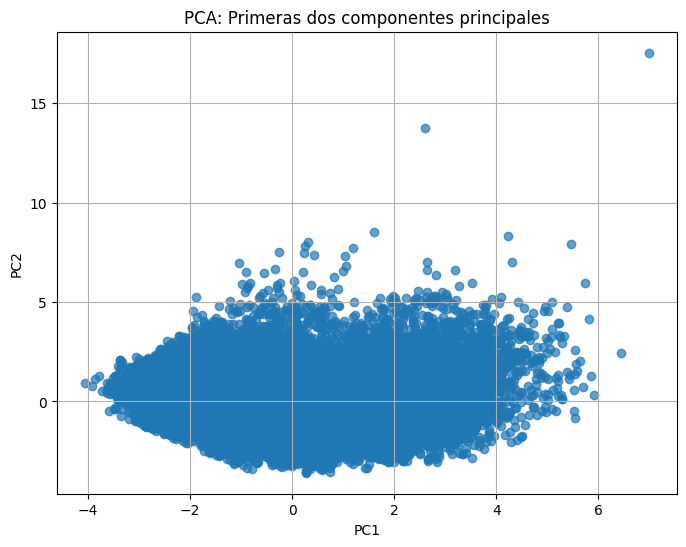

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Primeras dos componentes principales')
plt.grid(True)
plt.show()

In [ ]:
#TODO: Graficar la ocupación de las máquinas por estado play/stop, por sección, por usuario y por día

#TODO: Vamos a predecir la ocupación de las máquinas por estado play/stop, por sección, por usuario y por día


#TODO: Modelo propuesto - Regresion lineal + serie de tiempo o panel de datos
#TODO: Analisis de cluster para interpretar los resultados de la ocupación de las máquinas por estado play/stop, por sección, por usuario y por día
#TODO: Considerar la métrica de MAPE para evaluar el modelo de regresión lineal + serie de tiempo o panel de datos


## Ocupación por sección

In [163]:
# Tiempo total por sección por día para estado "PLAY"

# Filtrar solo filas donde Estado == "PLAY"
df_play = dataset[dataset['Estado'] == "PLAY"]
# Agrupar por día, sección y máquina, sumar la duración
data_maquina = df_play.groupby([ pd.Grouper(key='Fecha inicio', freq='D', sort=True),
	'Sección', 'Maquina'])['Duración [min]'].sum().reset_index()
data_maquina['Porcentaje_Ocupacion [%]'] = data_maquina['Duración [min]'] / 1440 * 100

# Fechas para todo el periodo
fechas = pd.date_range(start=data_maquina['Fecha inicio'].min(), end=data_maquina['Fecha inicio'].max(), freq='D')

# Añadir fechas al dataframe (asegurar que todas las fechas estén presentes para cada máquina en su sección correspondiente)
# Crear un DataFrame con todas las combinaciones posibles de fecha y máquina, usando la sección correcta para cada máquina
maquinas_secciones = dataset[['Sección', 'Maquina']].drop_duplicates()
all_combinations = (
	pd.MultiIndex.from_product(
		[fechas, maquinas_secciones['Maquina']],
		names=['Fecha inicio', 'Maquina']
	).to_frame(index=False)
	.merge(maquinas_secciones, on='Maquina', how='left')
)
# Unir con los datos originales
data_maquina = pd.merge(all_combinations, data_maquina, on=['Fecha inicio', 'Sección', 'Maquina'], how='left')
data_maquina.fillna(0, inplace=True)  # Rellenar NaN con 0

In [164]:
data_maquina

,Fecha inicio,Maquina,Sección,Duración [min],Porcentaje_Ocupacion [%]
0,2023-08-01,AMECPEGACA - Pegadora de Cajas Signature,Pegadora de Cajas,0.00,0.000000
1,2023-08-01,MAQSPEED - Maquina Speed master pliego 6,Prensa,545.93,37.911806
2,2023-08-01,MAQR700 - Maquina R700 6 color + barniz,Prensa,935.12,64.938889
3,2023-08-01,AMECPEGACA2 - Pegadora de Cajas Nueva,Pegadora de Cajas,0.00,0.000000
4,2023-08-01,BOBST102 - Troqueladora Bobst 102,Troquelado,0.00,0.000000
...,...,...,...,...,...
6651,2024-12-24,TROQ1/2 - Troqueladora de 1/2,Troquelado,66.78,4.637500
6652,2024-12-24,TROQ1/4 - Troqueladora de 1/4,Troquelado,0.00,0.000000
6653,2024-12-24,BANCOPREALISTAR2 - Banco de Prealistar 2,Troquelado,0.00,0.000000
6654,2024-12-24,BANCOPREALISTAR1 - Bando de Prealistar 1,Troquelado,0.00,0.000000


### Sección Prensa

In [165]:
data_prensa = data_maquina[data_maquina['Sección'] == 'Prensa']
print("Total de máquinas de la sección Prensa:")   
data_prensa['Maquina'].nunique()

Total de máquinas de la sección Prensa:


4

In [166]:
print("Promedio de ocupación diario por máquina en la sección Prensa:")
data_prensa.groupby('Maquina')['Porcentaje_Ocupacion [%]'].mean().sort_values(ascending=False)

Promedio de ocupación diario por máquina en la sección Prensa:


Maquina
MAQSPEED - Maquina Speed master pliego 6     25.273682
MAQR700 - Maquina R700 6 color + barniz      18.235733
MAQBICOLR - Maquina Roland Bicolor pliego     1.596541
INDIGO5500 - Indigo Hp 5500                   1.398135
Name: Porcentaje_Ocupacion [%], dtype: float64

La sección prensa utiliza 4 máquinas diferentes. La máquina con mayor ocupación promedio es la MAQSPEED, con un 25% promedio diario durante el periodo analizado.

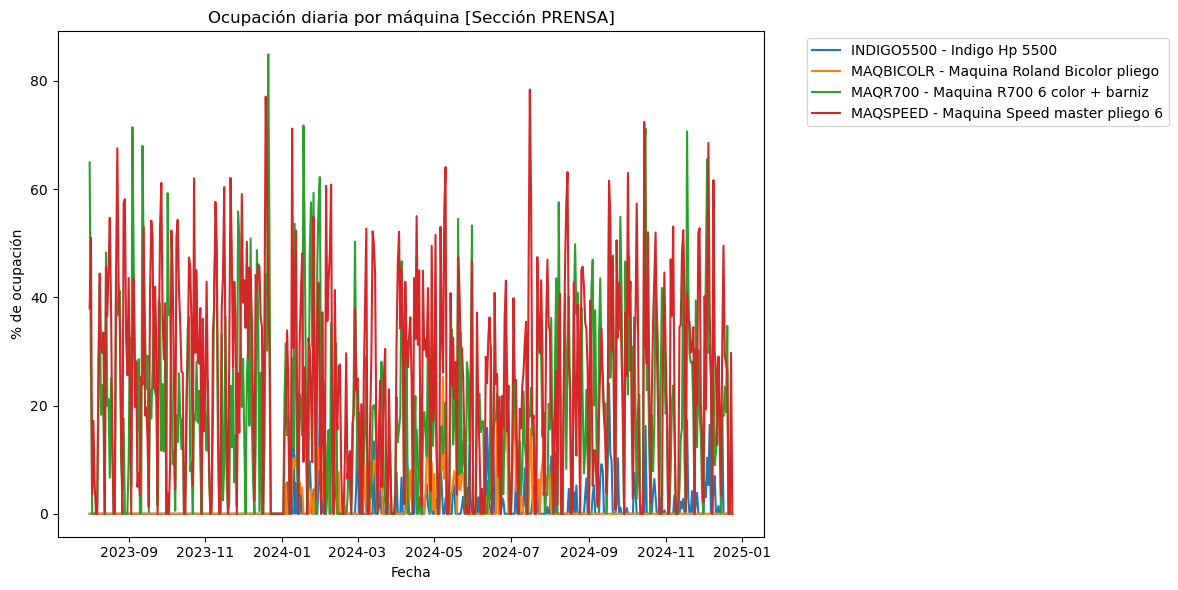

In [174]:
plt.figure(figsize=(12, 6))
for maquina, grupo in data_prensa.groupby('Maquina'):
    plt.plot(grupo['Fecha inicio'], grupo['Porcentaje_Ocupacion [%]'], label=maquina)
plt.xlabel('Fecha')
plt.ylabel('% de ocupación')
plt.title('Ocupación diaria por máquina [Sección PRENSA]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Sección Pegadora de Cajas

In [168]:
data_pegadora = data_maquina[data_maquina['Sección'] == 'Pegadora de Cajas']
print("Total de máquinas de la sección Pegadora de Cajas:")
data_pegadora['Maquina'].nunique()

Total de máquinas de la sección Pegadora de Cajas:


2

In [169]:
print("Promedio de ocupación diario por máquina en la sección Pegadora de Cajas:")
data_pegadora.groupby('Maquina')['Porcentaje_Ocupacion [%]'].mean().sort_values(ascending=False)

Promedio de ocupación diario por máquina en la sección Pegadora de Cajas:


Maquina
AMECPEGACA2 - Pegadora de Cajas Nueva       23.633931
AMECPEGACA - Pegadora de Cajas Signature    23.512907
Name: Porcentaje_Ocupacion [%], dtype: float64

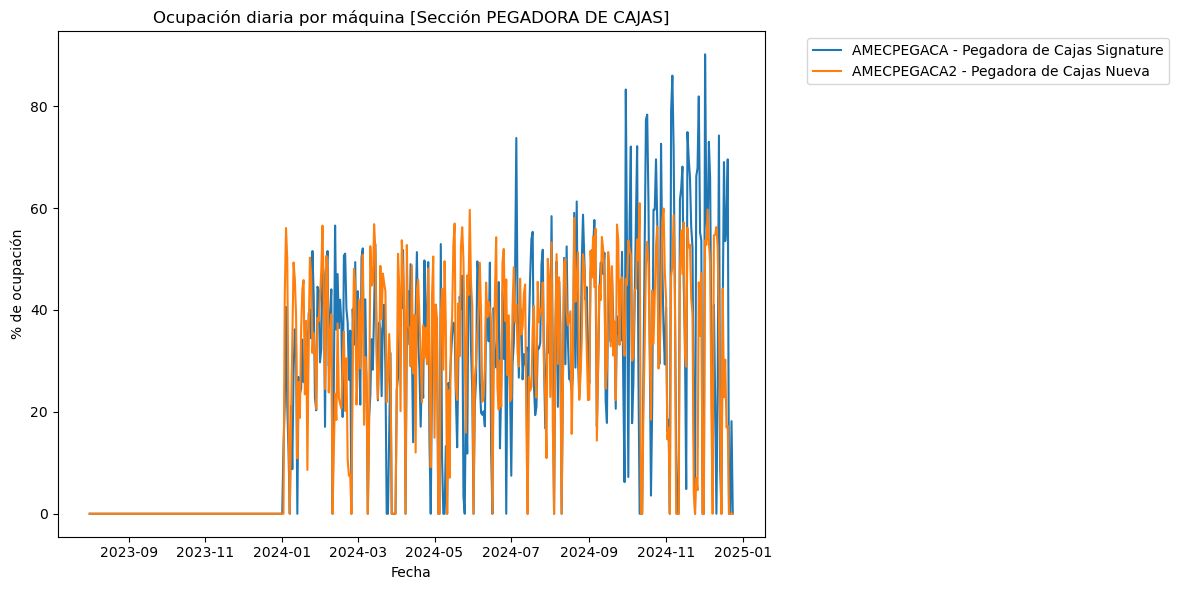

In [170]:
plt.figure(figsize=(12, 6))
for maquina, grupo in data_pegadora.groupby('Maquina'):
    plt.plot(grupo['Fecha inicio'], grupo['Porcentaje_Ocupacion [%]'], label=maquina)
plt.xlabel('Fecha')
plt.ylabel('% de ocupación')
plt.title('Ocupación diaria por máquina [Sección PEGADORA DE CAJAS]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Sección Troquelado

In [171]:
data_troquelado = data_maquina[data_maquina['Sección'] == 'Troquelado']
print("Total de máquinas de la sección Troquelado:")
data_troquelado['Maquina'].nunique()

Total de máquinas de la sección Troquelado:


7

In [172]:
print("Promedio de ocupación diario por máquina en la sección Troquelado:")
data_troquelado.groupby('Maquina')['Porcentaje_Ocupacion [%]'].mean().sort_values(ascending=False)

Promedio de ocupación diario por máquina en la sección Troquelado:


Maquina
BOBST102 - Troqueladora Bobst  102          25.559574
BOBST1080 - Troqueladora Bobst 1080         14.614640
TROQ1/2 - Troqueladora de 1/2                4.550684
TROQ1/4 - Troqueladora de 1/4                0.587923
NOVACUT106 - Troqueladora NovaCut 106        0.520543
BANCOPREALISTAR2 - Banco de Prealistar 2     0.000024
BANCOPREALISTAR1 - Bando de Prealistar 1     0.000000
Name: Porcentaje_Ocupacion [%], dtype: float64

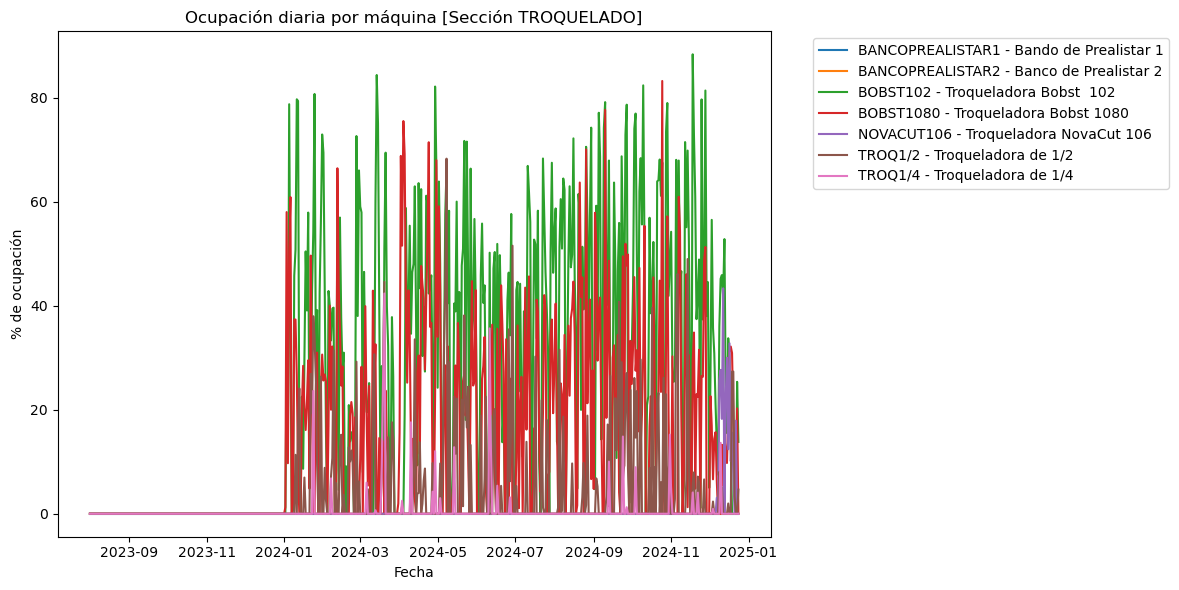

In [175]:
plt.figure(figsize=(12, 6))
for maquina, grupo in data_troquelado.groupby('Maquina'):
    plt.plot(grupo['Fecha inicio'], grupo['Porcentaje_Ocupacion [%]'], label=maquina)
plt.xlabel('Fecha')
plt.ylabel('% de ocupación')
plt.title('Ocupación diaria por máquina [Sección TROQUELADO]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()